In [1]:
# https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/08-deep-learning/homework.md

In [1]:
# wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
# unzip data.zip

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import time
import scipy
%matplotlib inline

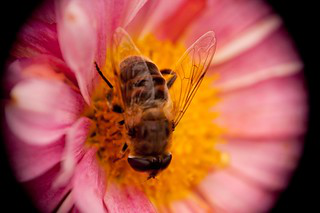

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
path = './data/test/bee/'
name = '10007154554_026417cfd0_n.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

Found 3677 files belonging to 2 classes.
Using 2942 files for training.
Found 3677 files belonging to 2 classes.
Using 735 files for validation.


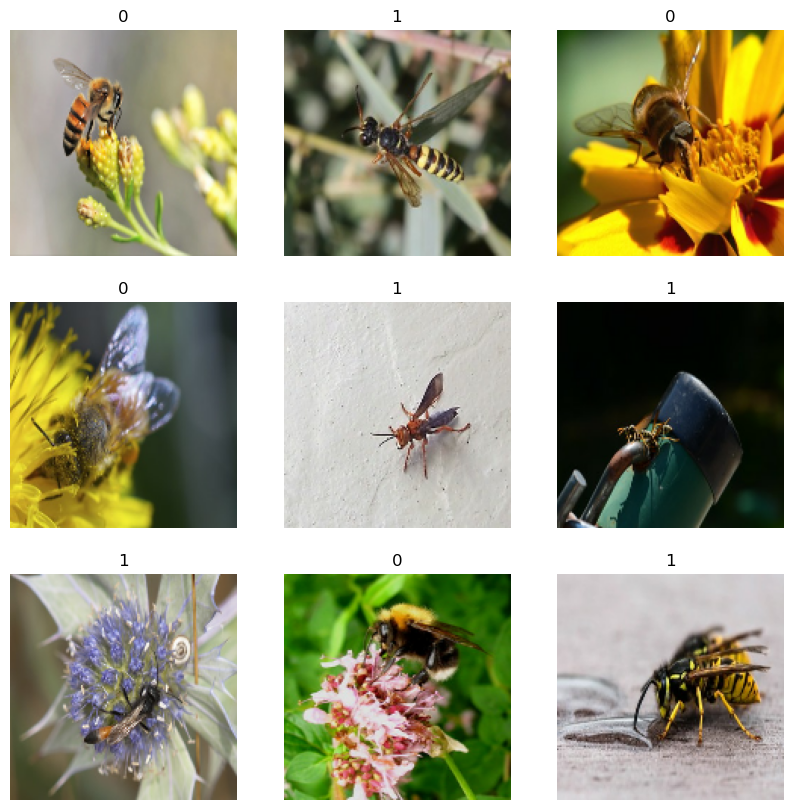

In [46]:
image_size = (150, 150)
batch_size = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
    "data/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "data/train",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

question 1

In [25]:
def make_model(input_shape, num_classes=2):
    inputs = keras.Input(shape=input_shape)

    x = keras.layers.Conv2D(32, 3, activation="relu")(inputs)
    x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(64, activation='relu')(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)
                                  
                                  
    model = keras.Model(inputs, outputs)
    
    #########################################
    optimizer = keras.optimizers.SGD(lr=0.002, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy(from_logits=False)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model




In [51]:
input_shape=(150, 150, 3)

model=make_model(input_shape)

/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


question 2

In [52]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 175232)            0         
                                                                 
 dense_8 (Dense)             (None, 64)                11214912  
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                           

In [53]:
data_generator = ImageDataGenerator(rescale=1./255)

train_ds = data_generator.flow_from_directory( 
    './data/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode="binary"
)
test_ds = data_generator.flow_from_directory( 
    './data/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode="binary"
)


Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [54]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
184/184 [==============================] - 10s 54ms/step - loss: 0.6769 - accuracy: 0.5766 - val_loss: 0.6314 - val_accuracy: 0.6187
Epoch 2/10
184/184 [==============================] - 9s 50ms/step - loss: 0.6361 - accuracy: 0.6323 - val_loss: 0.5925 - val_accuracy: 0.6852
Epoch 3/10
184/184 [==============================] - 9s 50ms/step - loss: 0.5845 - accuracy: 0.6932 - val_loss: 0.5719 - val_accuracy: 0.6852
Epoch 4/10
184/184 [==============================] - 9s 49ms/step - loss: 0.5354 - accuracy: 0.7362 - val_loss: 0.5349 - val_accuracy: 0.7266
Epoch 5/10
184/184 [==============================] - 9s 51ms/step - loss: 0.5093 - accuracy: 0.7656 - val_loss: 0.5187 - val_accuracy: 0.7407
Epoch 6/10
184/184 [==============================] - 9s 49ms/step - loss: 0.4836 - accuracy: 0.7778 - val_loss: 0.5188 - val_accuracy: 0.7625
Epoch 7/10
184/184 [==============================] - 9s 50ms/step - loss: 0.4565 - accuracy: 0.8004 - val_loss: 0.5113 - val_accuracy: 0.763

In [55]:
history.history

{'loss': [0.6768889427185059,
  0.6360912322998047,
  0.5844893455505371,
  0.5353659391403198,
  0.5093132853507996,
  0.4835653305053711,
  0.45653286576271057,
  0.4330875277519226,
  0.3974764347076416,
  0.36691370606422424],
 'accuracy': [0.5765569806098938,
  0.6323089599609375,
  0.6932281851768494,
  0.7361980080604553,
  0.7655697464942932,
  0.7778080105781555,
  0.8003807663917542,
  0.8109872341156006,
  0.8343758583068848,
  0.8515093922615051],
 'val_loss': [0.6314311623573303,
  0.5924810171127319,
  0.5718621611595154,
  0.5348943471908569,
  0.5187371373176575,
  0.5187788009643555,
  0.5112516283988953,
  0.4981813132762909,
  0.5311697721481323,
  0.5398258566856384],
 'val_accuracy': [0.6187363862991333,
  0.6851851940155029,
  0.6851851940155029,
  0.7265795469284058,
  0.7407407164573669,
  0.7625272274017334,
  0.7636165618896484,
  0.7636165618896484,
  0.7352941036224365,
  0.7320261597633362]}

# question 3

In [56]:
np.median(history.history['accuracy'])

0.7716888785362244

# question 4

In [57]:
np.std(history.history['loss'])

0.09618246659686677

# Data Augmentation

In [58]:
new_data_generator = ImageDataGenerator(rescale=1./255,                                   
                                        rotation_range=50,
                                        width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        zoom_range=0.1,
                                        horizontal_flip=True,
                                        fill_mode='nearest'
                                       )
train_ds = new_data_generator.flow_from_directory( 
    './data/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode="binary"
)

Found 3677 images belonging to 2 classes.


In [59]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
184/184 [==============================] - 25s 136ms/step - loss: 0.4975 - accuracy: 0.7675 - val_loss: 0.5121 - val_accuracy: 0.7647
Epoch 2/10
184/184 [==============================] - 25s 137ms/step - loss: 0.4918 - accuracy: 0.7683 - val_loss: 0.4673 - val_accuracy: 0.7800
Epoch 3/10
184/184 [==============================] - 25s 135ms/step - loss: 0.4878 - accuracy: 0.7716 - val_loss: 0.4764 - val_accuracy: 0.7843
Epoch 4/10
184/184 [==============================] - 26s 139ms/step - loss: 0.4942 - accuracy: 0.7669 - val_loss: 0.4933 - val_accuracy: 0.7625
Epoch 5/10
184/184 [==============================] - 25s 138ms/step - loss: 0.4843 - accuracy: 0.7754 - val_loss: 0.4778 - val_accuracy: 0.7734
Epoch 6/10
184/184 [==============================] - 25s 136ms/step - loss: 0.4817 - accuracy: 0.7784 - val_loss: 0.4927 - val_accuracy: 0.7702
Epoch 7/10
184/184 [==============================] - 25s 136ms/step - loss: 0.4651 - accuracy: 0.7813 - val_loss: 0.4808 - val_ac

# Question 5

In [60]:
np.mean(history.history['val_loss'])

0.4771817475557327

# Question 6

In [65]:
np.mean(history.history['val_accuracy'][-5:])


0.7836601376533509